In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import joblib

# Load dataset
df = pd.read_csv('/content/train.csv')  # Update path if needed

print("Dataset Shape:", df.shape)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Dataset (columns with missing>0):")
print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicate_rows}")

# Print dtypes
print("\nData Types:\n", df.dtypes)

# If duplicates exist, you may remove them:
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print("\nDuplicate rows dropped!")


Dataset Shape: (1117957, 22)

Missing Values in Dataset (columns with missing>0):
Series([], dtype: int64)

Total Duplicate Rows: 0

Data Types:
 id                                   int64
MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   

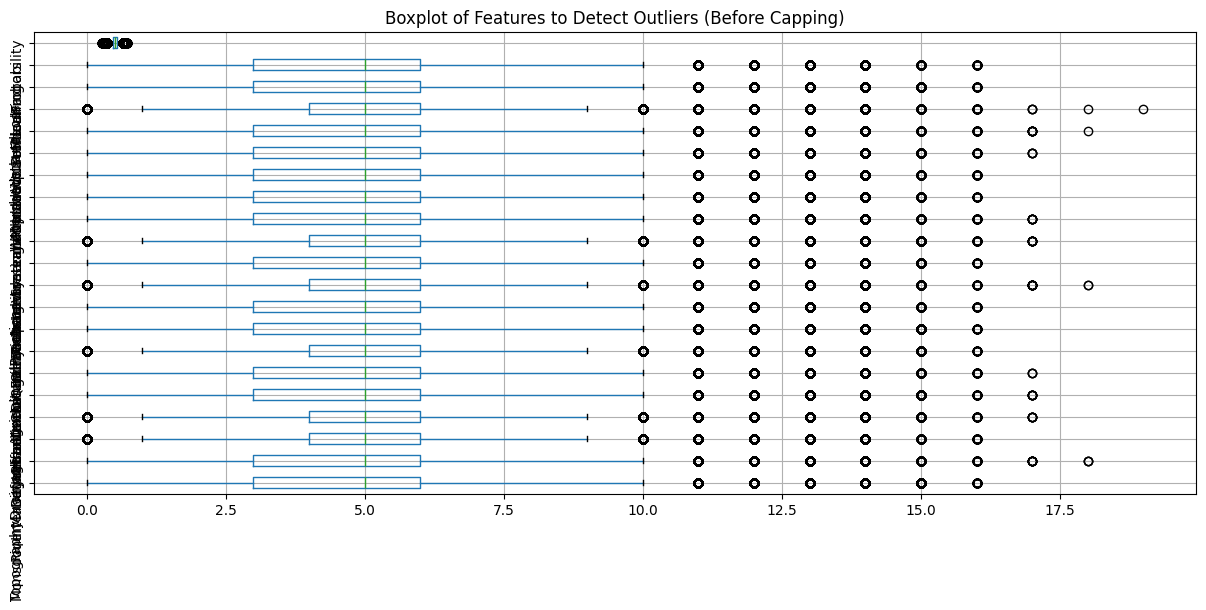

In [ ]:
# Plot boxplots for numerical features (excluding 'id')
plt.figure(figsize=(15, 6))

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if "id" in numeric_cols:
    numeric_cols.remove("id")

df[numeric_cols].boxplot(rot=90, vert=False)
plt.title("Boxplot of Features to Detect Outliers (Before Capping)")
plt.show()


In [ ]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply outlier capping on all numerical columns except 'FloodProbability' and 'id'
for col in numeric_cols:
    if col != "FloodProbability":
        df[col] = cap_outliers(df[col])

print("\nOutlier Handling Completed!")



Outlier Handling Completed!


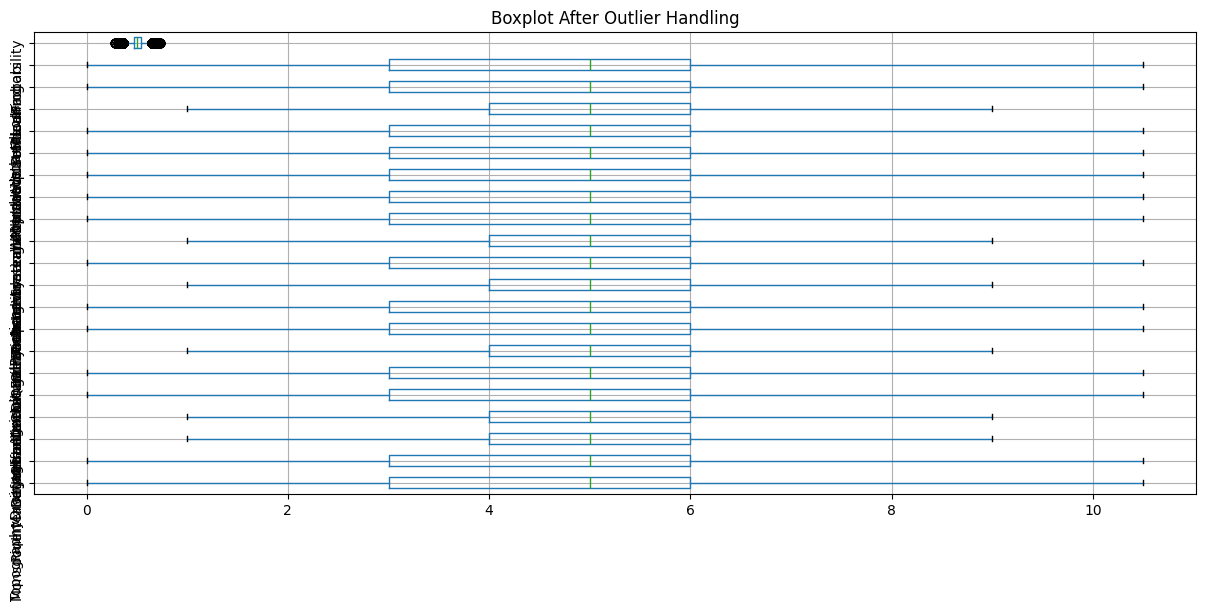

In [ ]:
plt.figure(figsize=(15, 6))
df[numeric_cols].boxplot(rot=90, vert=False)
plt.title("Boxplot After Outlier Handling")
plt.show()


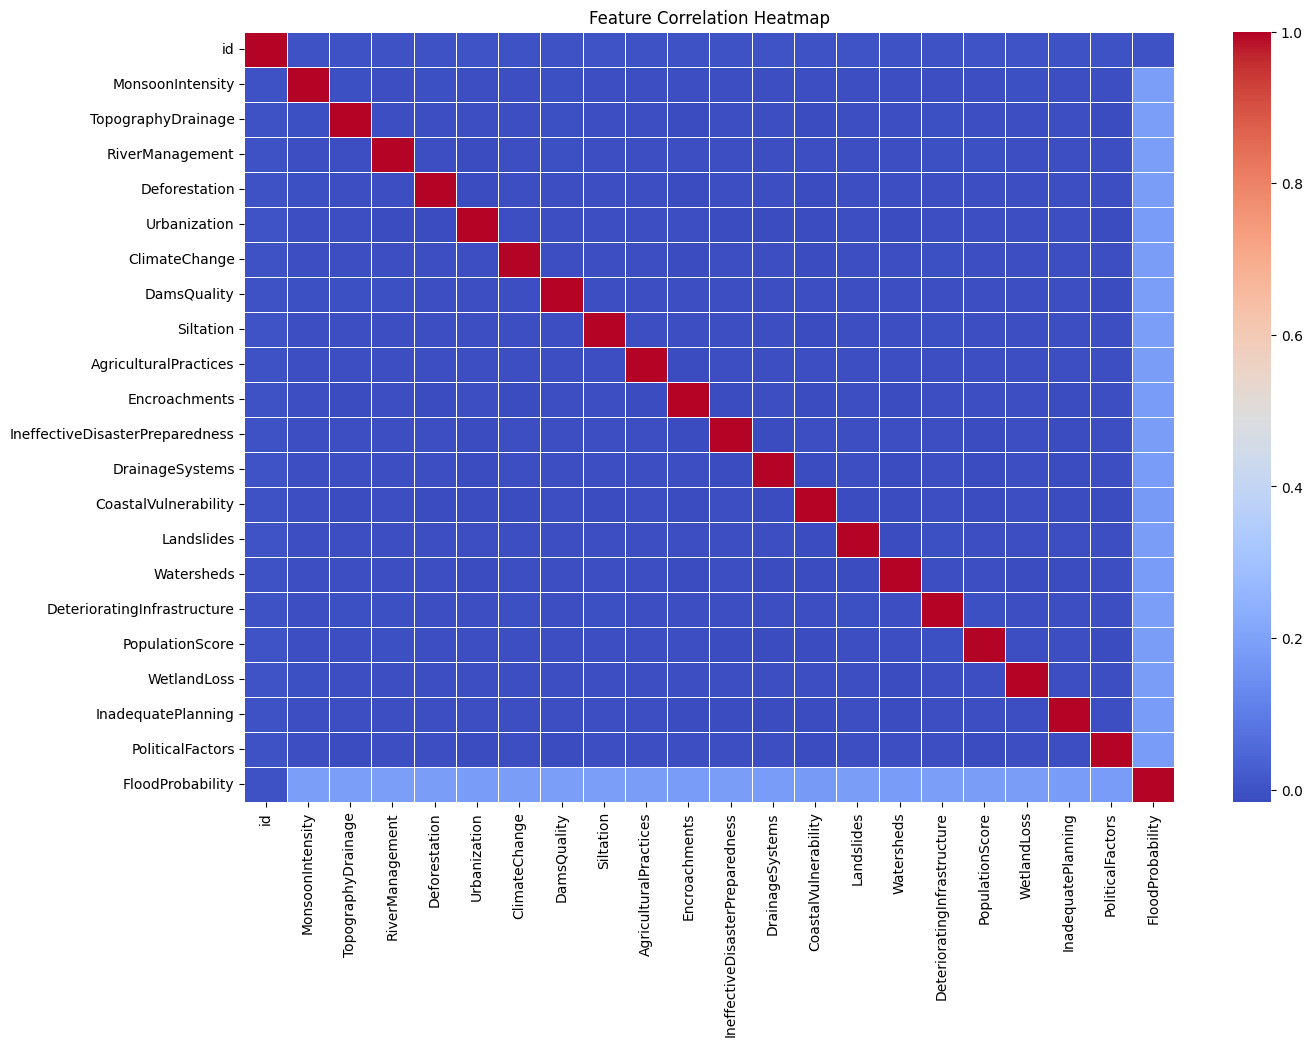


Top Features Correlated with Flood Probability:
FloodProbability                   1.000000
DeterioratingInfrastructure        0.190196
MonsoonIntensity                   0.189497
DamsQuality                        0.188026
TopographyDrainage                 0.187936
Siltation                          0.187143
RiverManagement                    0.187141
PopulationScore                    0.186049
Landslides                         0.185525
ClimateChange                      0.184933
Deforestation                      0.184237
AgriculturalPractices              0.183617
WetlandLoss                        0.183550
IneffectiveDisasterPreparedness    0.183547
PoliticalFactors                   0.182540
Watersheds                         0.182086
InadequatePlanning                 0.181331
Urbanization                       0.180902
DrainageSystems                    0.179199
Encroachments                      0.179090
CoastalVulnerability               0.177981
id                         

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Sort correlation values for FloodProbability (if it exists)
if "FloodProbability" in df.columns:
    flood_correlation = correlation_matrix["FloodProbability"].sort_values(ascending=False)
    print("\nTop Features Correlated with Flood Probability:")
    print(flood_correlation)


In [ ]:
if "id" in df.columns:
    df.drop(columns=["id"], errors='ignore', inplace=True)
    print("\n'id' column removed!")



'id' column removed!


In [ ]:
X = df.drop(columns=["FloodProbability"])
y = df["FloodProbability"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain/Test Split Done!")
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")




Train/Test Split Done!
Training Data: (894365, 21), Testing Data: (223592, 21)


In [ ]:
# If using Linear Regression, SVM, or Polynomial:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optionally save the scaler for future inference
joblib.dump(scaler, "scaler.pkl")
print("\nFeature Scaling Completed (for linear/polynomial models)!")



Feature Scaling Completed (for linear/polynomial models)!


In [ ]:

linear_model = LinearRegression()
# Use scaled data (X_train_scaled, y_train)
linear_model.fit(X_train_scaled, y_train)

# Predict
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"MSE: {mse_linear}")
print(f"R² Score: {r2_linear}")


MSE: 0.00042039594941962094
R² Score: 0.8382642010887384


In [ ]:
print("\n===== Random Forest =====")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Option 1: Train on unscaled data
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Option 2: Or train on scaled data (rf_model.fit(X_train_scaled, y_train))
# if you want a consistent approach. Usually doesn't matter for trees.

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE: {mse_rf}")
print(f"R² Score: {r2_rf}")



===== Random Forest =====
MSE: 0.0008946929211689152
R² Score: 0.655791463772959


In [ ]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("\n===== Polynomial Regression (Degree=2) =====")
poly_degree = 2

poly_model = make_pipeline(PolynomialFeatures(degree=poly_degree), LinearRegression())

# Train with scaled data
poly_model.fit(X_train_scaled, y_train)

# Predict on scaled
y_pred_poly = poly_model.predict(X_test_scaled)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"MSE: {mse_poly}")
print(f"R² Score: {r2_poly}")



===== Polynomial Regression (Degree=2) =====
MSE: 0.00040181551975123573
R² Score: 0.8454125112489089


In [ ]:
import pandas as pd
import numpy as np

# Load the full dataset
df = pd.read_csv("train.csv")  # Update path as needed

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate mean, median, and mode for the entire dataset
mean_full = df[numeric_cols].mean()
median_full = df[numeric_cols].median()
mode_full = df[numeric_cols].mode().iloc[0]  # .mode() returns a DataFrame, take the first row

print("=== Entire Dataset ===")
print("Mean:\n", mean_full)
print("\nMedian:\n", median_full)
print("\nMode:\n", mode_full)


=== Entire Dataset ===
Mean:
 id                                 558978.000000
MonsoonIntensity                        4.921450
TopographyDrainage                      4.926671
RiverManagement                         4.955322
Deforestation                           4.942240
Urbanization                            4.942517
ClimateChange                           4.934093
DamsQuality                             4.955878
Siltation                               4.927791
AgriculturalPractices                   4.942619
Encroachments                           4.949230
IneffectiveDisasterPreparedness         4.945239
DrainageSystems                         4.946893
CoastalVulnerability                    4.953999
Landslides                              4.931376
Watersheds                              4.929032
DeterioratingInfrastructure             4.925907
PopulationScore                         4.927520
WetlandLoss                             4.950859
InadequatePlanning                     

In [ ]:
import pandas as pd
import numpy as np

# Load the full dataset
df = pd.read_csv("train.csv")  # Update path as needed

# Randomly sample 300,000 rows
df_sample = df.sample(n=300_000, random_state=42)

# Select numeric columns
numeric_cols_sample = df_sample.select_dtypes(include=[np.number]).columns

# Calculate mean, median, and mode for the 300k sample
mean_sample = df_sample[numeric_cols_sample].mean()
median_sample = df_sample[numeric_cols_sample].median()
mode_sample = df_sample[numeric_cols_sample].mode().iloc[0]

print("=== 300K Sample ===")
print("Mean:\n", mean_sample)
print("\nMedian:\n", median_sample)
print("\nMode:\n", mode_sample)


=== 300K Sample ===
Mean:
 id                                 558970.508043
MonsoonIntensity                        4.921393
TopographyDrainage                      4.924127
RiverManagement                         4.950133
Deforestation                           4.945080
Urbanization                            4.951570
ClimateChange                           4.936493
DamsQuality                             4.957230
Siltation                               4.932070
AgriculturalPractices                   4.938587
Encroachments                           4.943160
IneffectiveDisasterPreparedness         4.945007
DrainageSystems                         4.945320
CoastalVulnerability                    4.947913
Landslides                              4.932677
Watersheds                              4.923537
DeterioratingInfrastructure             4.926313
PopulationScore                         4.924720
WetlandLoss                             4.954433
InadequatePlanning                      4.

In [ ]:


# 1) Load the dataset
csv_path = "/content/train.csv"  # Update if needed
df = pd.read_csv(csv_path)
print("Original Dataset Shape:", df.shape)

# 2) Sample the dataset to reduce size (e.g., 300,000 rows)
df_sample = df.sample(n=300_000, random_state=42)
print("Sampled Dataset Shape:", df_sample.shape)

# (Optional) Drop 'id' if it's irrelevant
if "id" in df_sample.columns:
    df_sample.drop("id", axis=1, inplace=True)

# 3) Define features (X) & target (y)
X = df_sample.drop(columns=["FloodProbability"])  # Confirm your target col is 'FloodProbability'
y = df_sample["FloodProbability"]

# 4) Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# 5) Scale the features (beneficial for polynomial/linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed!")

# 6) Train a Degree-3 Polynomial Regression
poly_degree = 3
poly_model_3 = make_pipeline(
    PolynomialFeatures(degree=poly_degree),
    LinearRegression()
)

print(f"Training Polynomial Regression (Degree={poly_degree}) on 300k sample...")
poly_model_3.fit(X_train_scaled, y_train)

# 7) Predict & evaluate on Test Set
y_pred_test = poly_model_3.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\n=== Polynomial Regression (Degree=3) - TEST Results ===")
print(f"MSE (Test): {mse_test}")
print(f"R²  (Test): {r2_test}")

# 8) Overfitting Check: Evaluate on Training Set
y_pred_train = poly_model_3.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("\n=== Overfitting Check (Train vs. Test) ===")
print(f"MSE (Train): {mse_train}")
print(f"R²  (Train): {r2_train}")

diff_r2 = r2_train - r2_test
if diff_r2 > 0.1:
    print(f"\nLikely Overfitting (Train R² higher by {diff_r2:.4f}).")
else:
    print("\nNo major sign of overfitting based on R² difference.")


Original Dataset Shape: (1117957, 22)
Sampled Dataset Shape: (300000, 22)
Train shape: (240000, 20), Test shape: (60000, 20)
Scaling completed!
Training Polynomial Regression (Degree=3) on 300k sample...

=== Polynomial Regression (Degree=3) - TEST Results ===
MSE (Test): 0.0003957404511752299
R²  (Test): 0.8480858931461177

=== Overfitting Check (Train vs. Test) ===
MSE (Train): 0.0003882620262236684
R²  (Train): 0.8505780419786214

No major sign of overfitting based on R² difference.


In [ ]:
import joblib

# After training your model (poly_model_3), simply call joblib.dump:
model_filename = "final_poly_model_degree3.pkl"
joblib.dump(poly_model_3, model_filename)
print(f"✅ Model saved successfully as '{model_filename}'")

# If you want to save the scaler as well (for consistent scaling at inference):
scaler_filename = "scaler.pkl"
joblib.dump(scaler, scaler_filename)
print(f"✅ Scaler saved successfully as '{scaler_filename}'")
